Procesando imagen: 1104.png


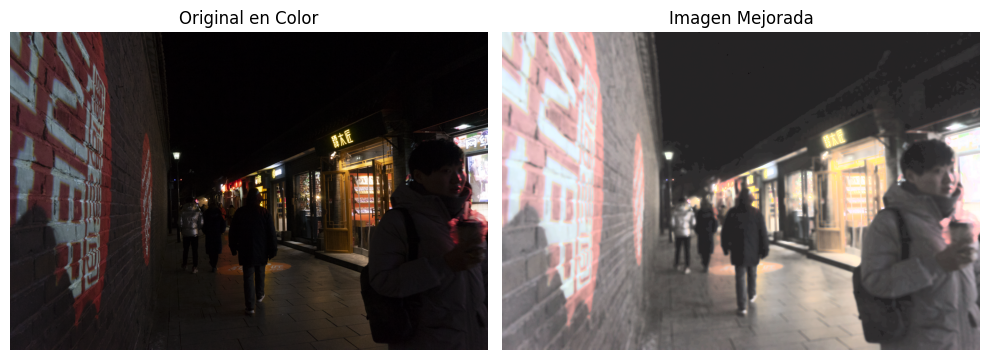

Procesando imagen: 1067.png


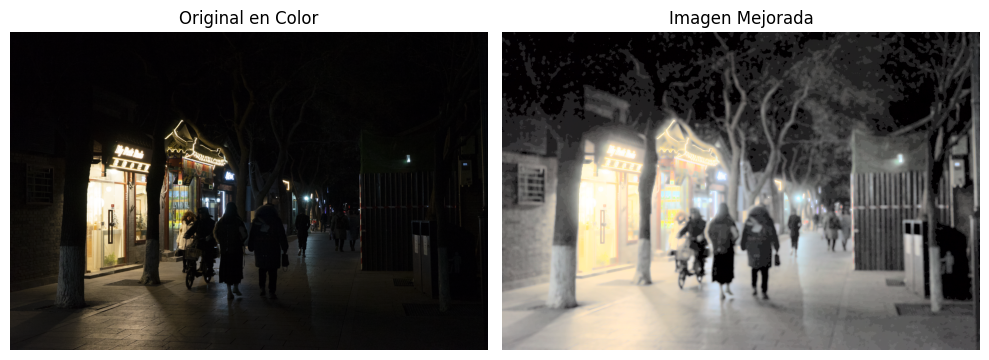

Procesando imagen: 1051.png


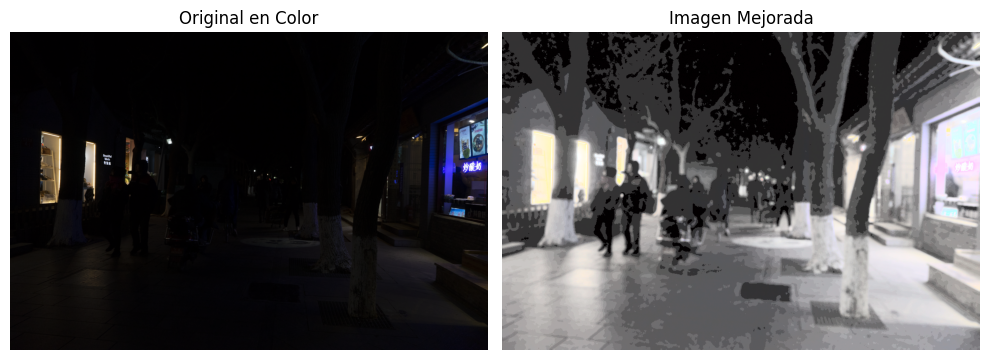

Procesando imagen: 1017.png


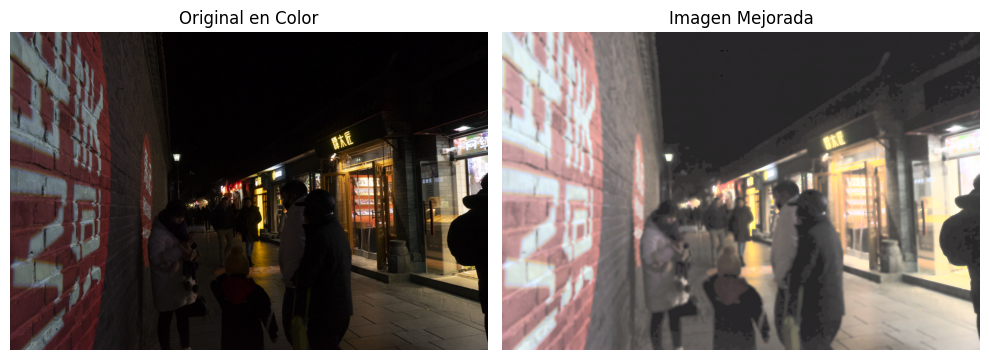

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def process_image(image_path, save_output=False):
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return

    # Convertir a espacio de color LAB para ajustar luminancia
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # --- Eliminación de ruido con filtro bilateral ---
    l_denoised = cv2.bilateralFilter(l, d=9, sigmaColor=75, sigmaSpace=75)

    # --- Realce de detalles usando ecualización del histograma ---
    l_equalized = cv2.equalizeHist(l_denoised)

    # --- Ajuste de intensidad: Transformación gamma ---
    gamma = 1.2  # Ajusta el valor de gamma (mayor que 1 para aclarar)
    l_gamma_corrected = np.power(l_equalized / 255.0, gamma) * 255.0
    l_gamma_corrected = np.uint8(l_gamma_corrected)

    # Fusionar las modificaciones de la luminancia con los canales de color
    lab_processed = cv2.merge((l_gamma_corrected, a, b))
    image_enhanced = cv2.cvtColor(lab_processed, cv2.COLOR_LAB2BGR)

    # Mostrar las imágenes
    images = [image, image_enhanced]
    titles = ['Original en Color', 'Imagen Mejorada']

    plt.figure(figsize=(10, 5))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Guardar el resultado si se requiere
    if save_output:
        output_path = image_path.replace('.png', '_enhanced_color.png')
        cv2.imwrite(output_path, image_enhanced)
        print(f"Imagen guardada en: {output_path}")

# Procesar todas las imágenes cargadas
image_paths = ["1104.png", "1067.png", "1051.png", "1017.png"]
for path in image_paths:
    print(f"Procesando imagen: {path}")
    process_image(path)


Procesando imagen: 1104.png


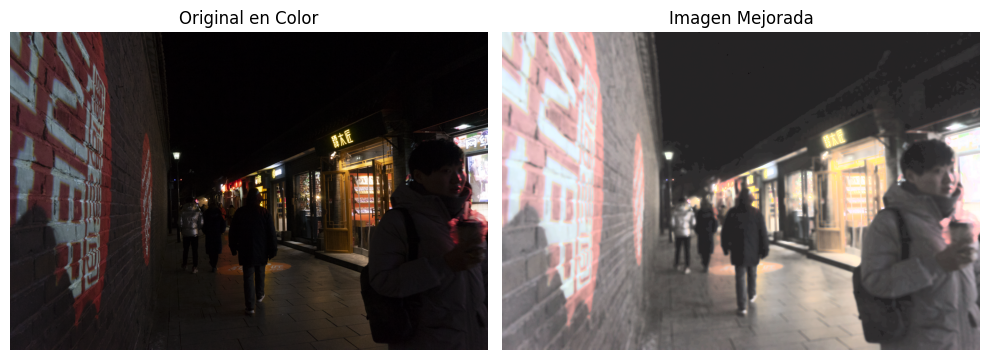

Imagen guardada en: processed_images/1104_enhanced_color.png
Procesando imagen: 1067.png


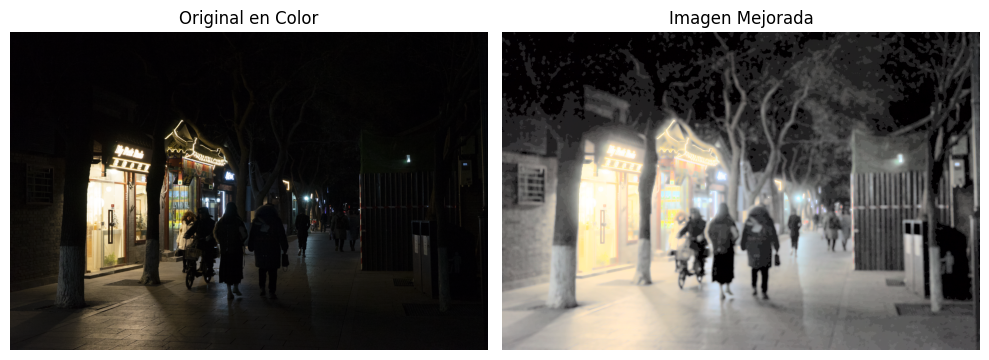

Imagen guardada en: processed_images/1067_enhanced_color.png
Procesando imagen: 1051.png


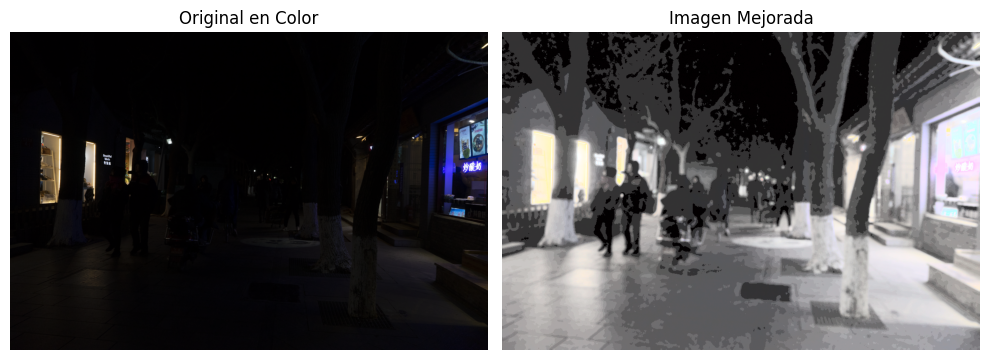

Imagen guardada en: processed_images/1051_enhanced_color.png
Procesando imagen: 1017.png


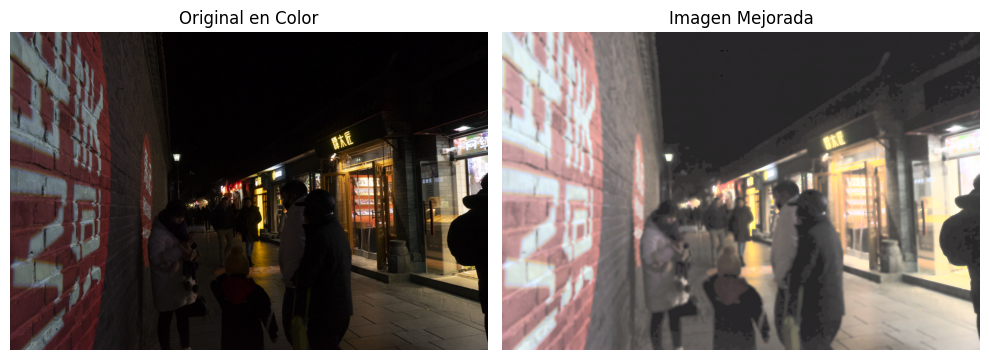

Imagen guardada en: processed_images/1017_enhanced_color.png


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def process_image(image_path, save_output=False, output_dir="processed_images"):
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return

    # Convertir a espacio de color LAB para ajustar luminancia
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # --- Eliminación de ruido con filtro bilateral ---
    l_denoised = cv2.bilateralFilter(l, d=9, sigmaColor=75, sigmaSpace=75)

    # --- Realce de detalles usando ecualización del histograma ---
    l_equalized = cv2.equalizeHist(l_denoised)

    # --- Ajuste de intensidad: Transformación gamma ---
    gamma = 1.2  # Ajusta el valor de gamma (mayor que 1 para aclarar)
    l_gamma_corrected = np.power(l_equalized / 255.0, gamma) * 255.0
    l_gamma_corrected = np.uint8(l_gamma_corrected)

    # Fusionar las modificaciones de la luminancia con los canales de color
    lab_processed = cv2.merge((l_gamma_corrected, a, b))
    image_enhanced = cv2.cvtColor(lab_processed, cv2.COLOR_LAB2BGR)

    # Mostrar las imágenes
    images = [image, image_enhanced]
    titles = ['Original en Color', 'Imagen Mejorada']

    plt.figure(figsize=(10, 5))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Guardar el resultado si se requiere
    if save_output:
        # Crear directorio si no existe
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, os.path.basename(image_path).replace('.png', '_enhanced_color.png'))
        cv2.imwrite(output_path, image_enhanced)
        print(f"Imagen guardada en: {output_path}")

# Procesar todas las imágenes cargadas
image_paths = ["1104.png", "1067.png", "1051.png", "1017.png"]
output_directory = "processed_images"
for path in image_paths:
    print(f"Procesando imagen: {path}")
    process_image(path, save_output=True, output_dir=output_directory)


Analizando brillo para: 1104.png
Promedio de Luminosidad - Original: 31.34
Promedio de Luminosidad - Procesada: 120.51
Incremento porcentual de Luminosidad: 284.53%


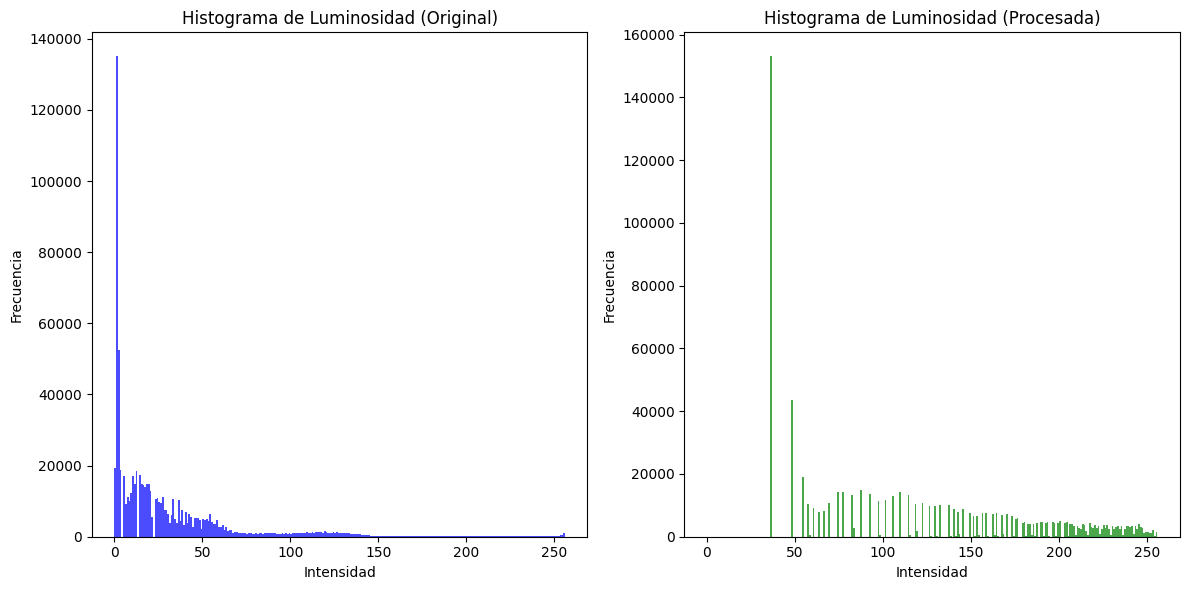

Analizando brillo para: 1067.png
Promedio de Luminosidad - Original: 24.83
Promedio de Luminosidad - Procesada: 104.57
Incremento porcentual de Luminosidad: 321.23%


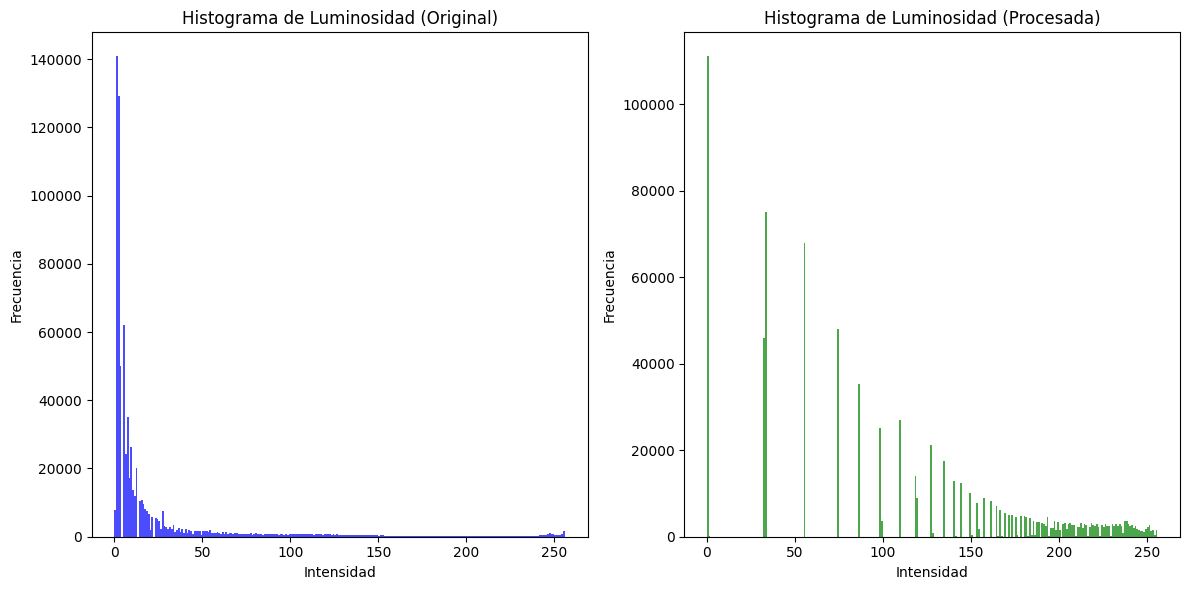

Analizando brillo para: 1051.png
Promedio de Luminosidad - Original: 8.47
Promedio de Luminosidad - Procesada: 112.90
Incremento porcentual de Luminosidad: 1233.48%


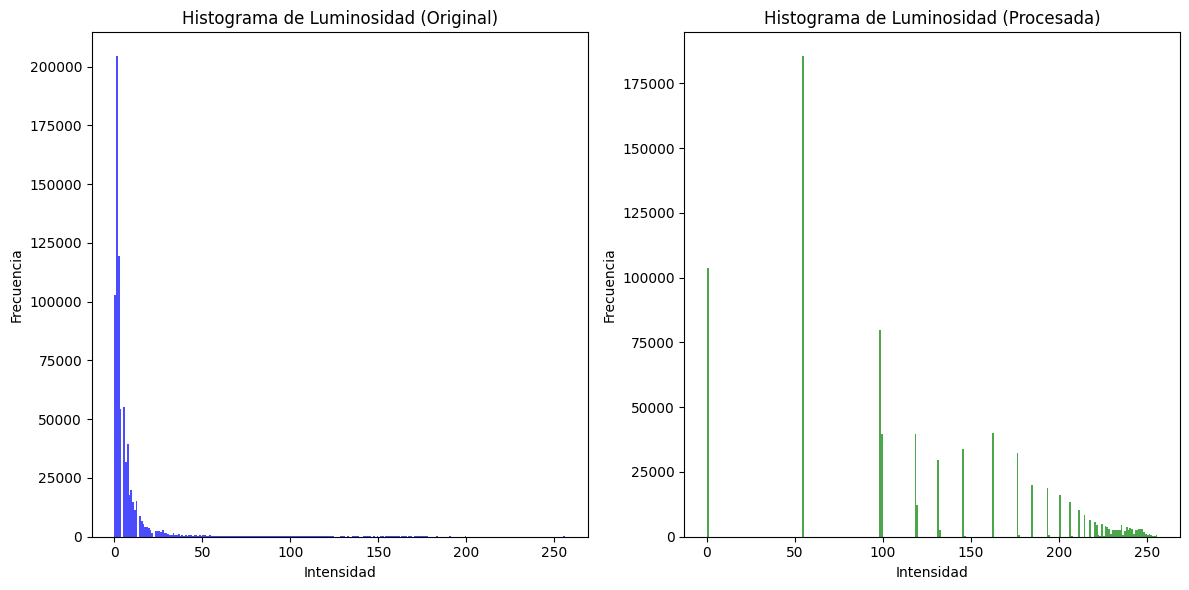

Analizando brillo para: 1017.png
Promedio de Luminosidad - Original: 37.92
Promedio de Luminosidad - Procesada: 121.26
Incremento porcentual de Luminosidad: 219.78%


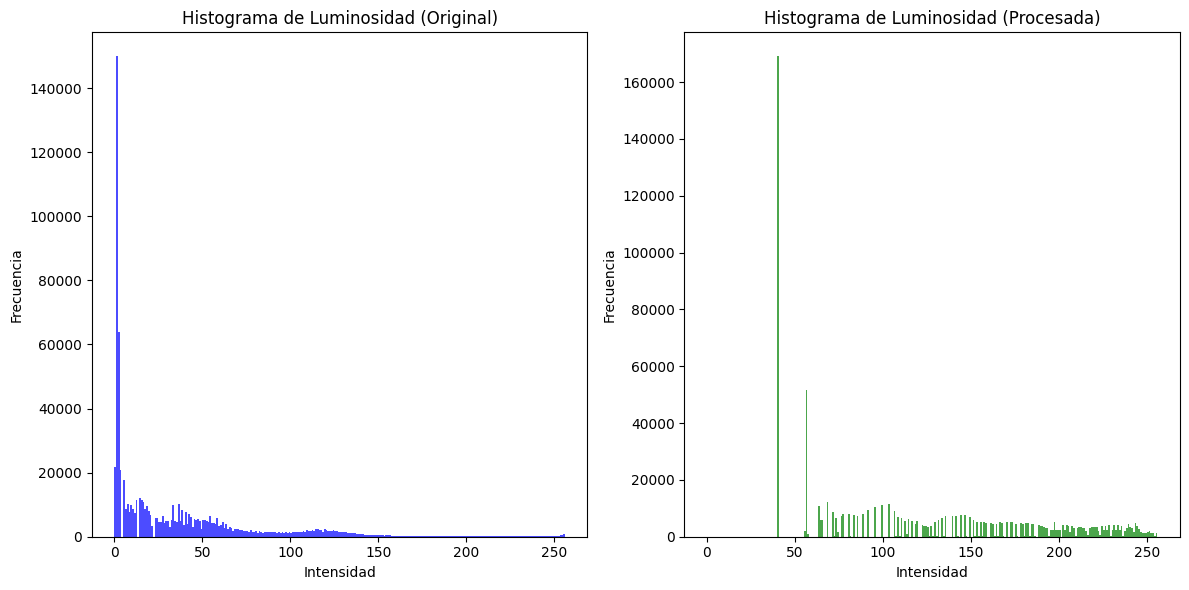

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def analyze_brightness(image_path, processed_image_path):
    # Cargar las imágenes
    original = cv2.imread(image_path)
    processed = cv2.imread(processed_image_path)

    if original is None or processed is None:
        print(f"Error al cargar las imágenes: {image_path} o {processed_image_path}")
        return

    # Convertir al espacio de color LAB para acceder al canal de luminancia
    original_lab = cv2.cvtColor(original, cv2.COLOR_BGR2LAB)
    processed_lab = cv2.cvtColor(processed, cv2.COLOR_BGR2LAB)

    l_original, _, _ = cv2.split(original_lab)
    l_processed, _, _ = cv2.split(processed_lab)

    # Calcular el promedio de luminancia
    avg_luminance_original = np.mean(l_original)
    avg_luminance_processed = np.mean(l_processed)

    # Calcular el incremento porcentual en la luminancia
    brightness_increase = ((avg_luminance_processed - avg_luminance_original) / avg_luminance_original) * 100

    print(f"Promedio de Luminosidad - Original: {avg_luminance_original:.2f}")
    print(f"Promedio de Luminosidad - Procesada: {avg_luminance_processed:.2f}")
    print(f"Incremento porcentual de Luminosidad: {brightness_increase:.2f}%")

    # Visualizar las luminancias originales y procesadas
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(l_original.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histograma de Luminosidad (Original)')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    plt.hist(l_processed.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
    plt.title('Histograma de Luminosidad (Procesada)')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Directorio de imágenes procesadas
output_directory = "processed_images"

# Analizar brillo para cada imagen
image_paths = ["1104.png", "1067.png", "1051.png", "1017.png"]
for path in image_paths:
    processed_path = os.path.join(output_directory, os.path.basename(path).replace('.png', '_enhanced_color.png'))
    print(f"Analizando brillo para: {path}")
    analyze_brightness(path, processed_path)


Analizando brillo para: 1104.png
Error al cargar las imágenes: 1104.png o 1104_enhanced_color.png
Analizando brillo para: 1067.png
Error al cargar las imágenes: 1067.png o 1067_enhanced_color.png
Analizando brillo para: 1051.png
Error al cargar las imágenes: 1051.png o 1051_enhanced_color.png
Analizando brillo para: 1017.png
Error al cargar las imágenes: 1017.png o 1017_enhanced_color.png
